##### Problem Statement
In this assignment students have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value. Student can download data in .csv format from the following link:

https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line

##### Hint:

Following is the command import packages and data 

from pandas import read_csv 

from pandas import datetime

from matplotlib import pyplot

from statsmodels.tsa.arima_model

import ARIMA from sklearn.metrics

import mean_squared_error def

parser(x):

return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA 
from sklearn.metrics import mean_squared_error 

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

C:\Users\dell\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [3]:
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [4]:
series.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64

##### Splitting train and test dataset

In [30]:
X = series.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]

##### Model building and forecasting

In [31]:
past_values = [x for x in train]
predictions = list()
for t in range(len(test)): 
    model = ARIMA(past_values, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    past_values.append(obs)
    print('Predicted value=%f, Actual value=%f' % (yhat, obs))


Predicted value=356.082058, Actual value=401.300000
Predicted value=446.379454, Actual value=437.400000
Predicted value=394.737253, Actual value=575.500000
Predicted value=434.915502, Actual value=407.600000
Predicted value=507.923469, Actual value=682.000000
Predicted value=435.482928, Actual value=475.300000
Predicted value=652.743770, Actual value=581.300000
Predicted value=546.343496, Actual value=646.900000


In [32]:

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 10331.308


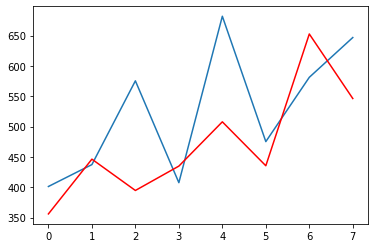

In [33]:
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()